# Getting prediction from model endpoint

### Get the access token
- Use this when you are running this in a cpd env

In [1]:
import os
mltoken = os.environ['USER_ACCESS_TOKEN']


### Alternatively, you can get token using username and api key
- Use this when using it outside of a cpd env.
- Please provide `cpdhost`, `username` and `apikey`.

In [ ]:
import requests;
cpdhost="<cpd hostname>"
username='<username>'
apikey='<api key>'

def getToken(cpdhost,username,apikey):
    auth_url = "{0}/icp4d-api/v1/authorize".format(cpdhost)
    auth_response = requests.post(
        auth_url,
        headers={
            "Content-Type": "application/json"
        },
        data='{"username": "'+username+'", "api_key": "'+apikey+'"}',
        verify=False)
    return auth_response.json()['token']
mltoken=getToken(cpdhost,username,apikey)
mltoken

#### Create the payload for Scoring

In [2]:
fields = ["DAY","DAY_OF_WEEK","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DELAY","TAXI_OUT","DISTANCE"]
values = [23,5,"MSP","PHX",-2.0,13.0,1276]

#### Use the code snippet provided to you when you deployed the Model to call the Model for prediction using Rest Protocol. 

From the deployment details (in API Reference tab) get the code snippet to call the Model for prediction using Rest Protocol. 

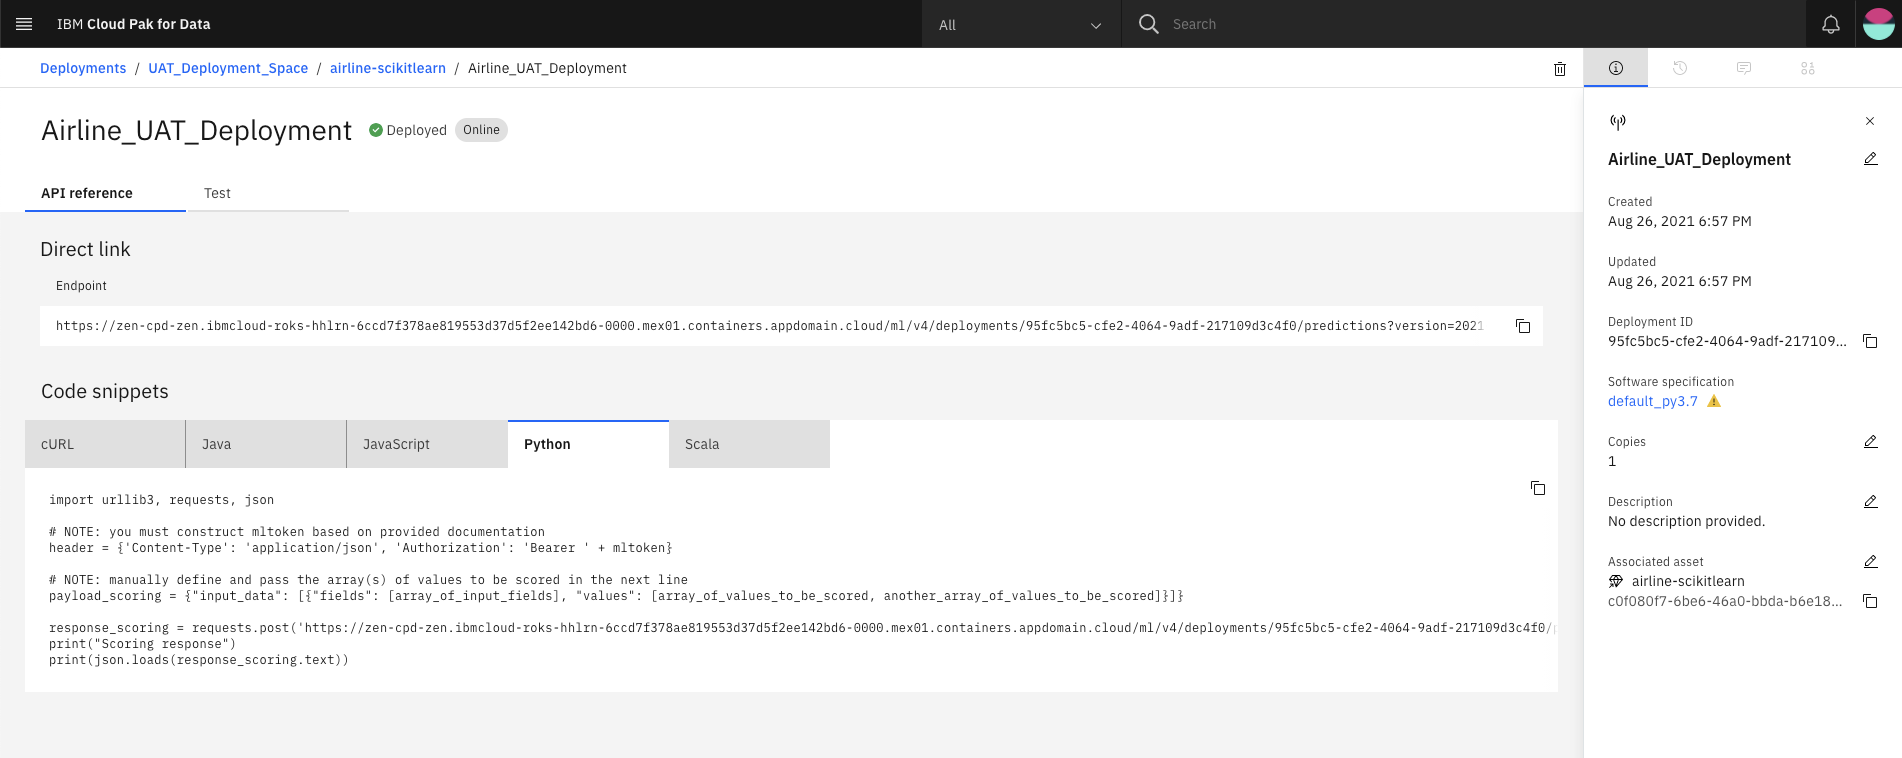

Here, since we are using Python program to call the Model for Prediction hence we are using Code snippet for Python. In case of other programming languages, code snippet for respective language can be used.

Change the Code to substitute value for `array_of_input_fields` with `fields` and `array_of_values_to_be_scored, another_array_of_values_to_be_scored` with `values`. These are the variables you created in the previous step.

Now, replace the `prediction_url` in `requests.post` with the copied Endpoint from API reference Tab (Image shown above for Endpoint).  Then, remove [ ] around `prediction_url` in `requests.post` below. 

You may also need to use verify=False to avoid check in requests.post call.

A sample code is shown below in the next cell. You need replace the content of the cell below to copy the code snippet and change the appropriate variable before running the same.

In [4]:
import urllib3, requests, json

# NOTE: you must construct mltoken based on provided documentation	
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": fields, "values": [values]}]}

# NOTE: Replace with Endpoint link
prediction_url = "https://zen-cpd-zen.ibmcloud-roks-hhlrn-6ccd7f378ae819553d37d5f2ee142bd6-0000.mex01.containers.appdomain.cloud/ml/v4/deployments/95fc5bc5-cfe2-4064-9adf-217109d3c4f0/predictions?version=2021-08-26"


response_scoring = requests.post(prediction_url, \
                                     json=payload_scoring, headers=header, verify=False)
print("Scoring response")
print(json.loads(response_scoring.text))

Scoring response
{'predictions': [{'fields': ['prediction', 'probability'], 'values': [[0, [0.9906604942950165, 0.009339505704983594]]]}]}


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zen-cpd-zen.ibmcloud-roks-hhlrn-6ccd7f378ae819553d37d5f2ee142bd6-0000.mex01.containers.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
